In [2]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [7]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       
        if 'Control' in label:
            conc = 'Control'
        if '1 mg/ml' in label:
            conc = '1 mg/ml'
        if '0.1 mg/ml' in label:
            conc = '0.1 mg/ml'
        if '0.01 mg/ml' in label:
            conc = '0.01 mg/ml'

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        data_pd_i['Concentration'] = conc

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [28]:
sample_1_path = "C:\\Users\\Modern\\Desktop\\Python\\MTT assay multi\\Data\\TDA_2_10_4.xlsx"
sample_2_path = "C:\\Users\\Modern\\Desktop\\Python\\MTT assay multi\\Data\\TDA_2_11_1.xlsx"

sample_1_raw = pd.read_excel(sample_1_path)
sample_2_raw = pd.read_excel(sample_2_path)


In [29]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

data_pd = excel_to_pd(data_pd,data_pd_i,sample_1_raw,'Vero','TDA_2_10_4')
data_pd = excel_to_pd(data_pd,data_pd_i,sample_2_raw,'Vero','TDA_2_11_1')


# print(data_pd)

<AxesSubplot: xlabel='Substance', ylabel='OD'>

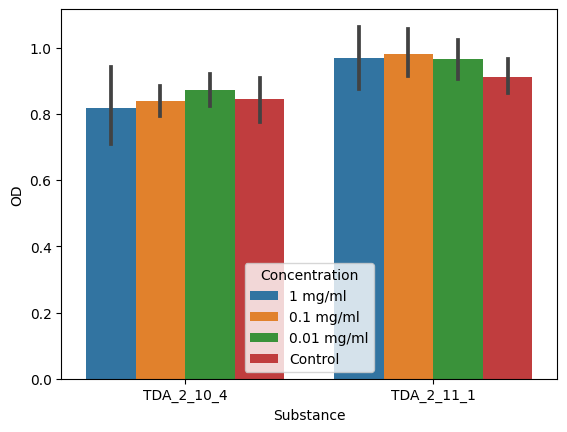

In [30]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

In [32]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = ['TDA_2_10_4','TDA_2_11_1']

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_ext[(data_ext['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
# print(data)

C:\Users\Modern\AppData\Local\Temp\ipykernel_23040\1101417934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_23040\1101417934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TDA_2_11_1_0.01 mg/ml vs. TDA_2_11_1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.096e-01 U_stat=2.780e+02
TDA_2_10_4_0.01 mg/ml vs. TDA_2_10_4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.420e+02
TDA_2_10_4_0.1 mg/ml vs. TDA_2_10_4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.140e+02
TDA_2_11_1_0.1 mg/ml vs. TDA_2_11_1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.720e+02
TDA_2_10_4_1 mg/ml vs. TDA_2_10_4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.840e+02
TDA_2_11_1_1 mg/ml vs. TDA_2_11_1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correcti

(<AxesSubplot: xlabel='Substance', ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x21a912975b0>])

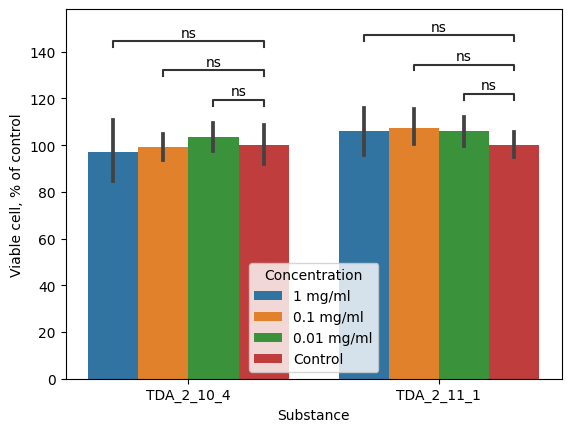

In [33]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration')
ax.set(xlabel='Substance', ylabel='Viable cell, % of control')

pairs=[(('TDA_2_10_4','Control'),('TDA_2_10_4','1 mg/ml')),(('TDA_2_10_4','Control'),('TDA_2_10_4','0.1 mg/ml')),(('TDA_2_10_4','Control'),('TDA_2_10_4','0.01 mg/ml')),
       (('TDA_2_11_1','Control'),('TDA_2_11_1','1 mg/ml')),(('TDA_2_11_1','Control'),('TDA_2_11_1','0.1 mg/ml')),(('TDA_2_11_1','Control'),('TDA_2_11_1','0.01 mg/ml'))]

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

